In [80]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [75]:
def sample_from_ar1(phi, sigma, N, seed=101):
    cov = np.zeros([N,N])
    mu = np.zeros(N)
    # Create covariance matrix
    for i in range(0,N):
        for j in range(0,N):
            h = np.abs(i-j)
            cov[i,j]=(sigma**2 * phi**h)/(1-phi**2)
    return stats.multivariate_normal.rvs(mean=mu,cov=cov,size=1, random_state=seed)


## Estimating the trend

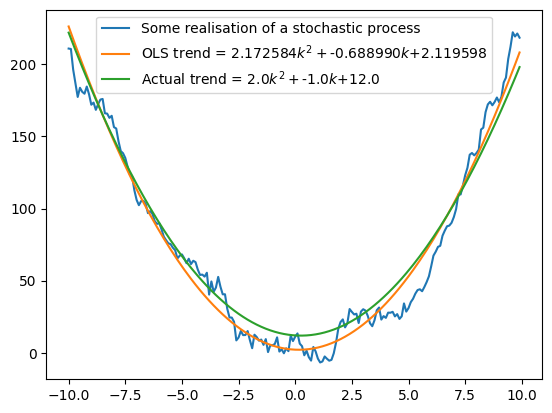

In [91]:
def quadratic(x, a, b,c):
    return a * x**2 + b * x + c

# generate data
phi = 0.9
N = 400
sigma = 1.0
a = 2.0
b = -1.0
c = 12.0
x = np.arange(-10,10,0.1)
# generate realisation of error process
err = sample_from_ar1(0.9,5,x.shape[0],1)
y = a*x**2 + b*x + c 
yerr = a*x**2 + b*x + c + err

# estimate best parameter via curve fitting
popt, pcov = curve_fit(quadratic, x, yerr)
yopt = quadratic(x, popt[0], popt[1], popt[2])

# plot
plt.plot(x,yerr, label='Some realisation of a stochastic process')
plt.plot(x,yopt, label=r'OLS trend = {a:1f}$k^2+${b:1f}$k$+{c:1f}'.format(a=popt[0],b=popt[1],c=popt[2]))
plt.plot(x,y, label=r'Actual trend = {a}$k^2+${b}$k$+{c}'.format(a=a,b=b,c=c))
plt.legend()
plt.show()

## Estimate seasonality

[]

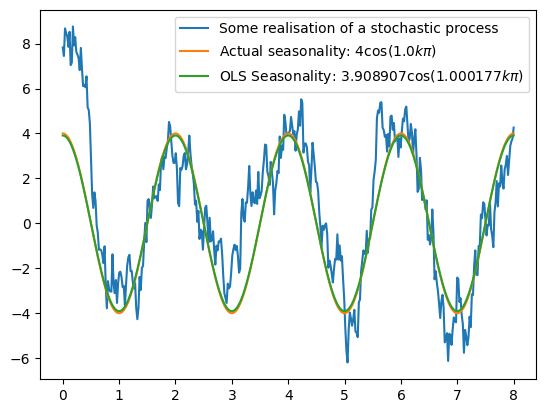

In [97]:
# periodic function
def periodic(x, A, h):
    return A*np.cos(h*x*np.pi)

#generate data
period=1.0
amplitude = 4
x = np.linspace(0,8,400)
seasonal = periodic(x, amplitude, period)
# generate realisation of error process
seasonalerr = sample_from_ar1(0.9,0.75,x.shape[0],1)
yerr = seasonal + seasonalerr
 
# estimate best parameter via curve fitting
popt, pcov = curve_fit(periodic, x, yerr)
yopt = periodic(x, popt[0], popt[1])

#plot
plt.plot(x, seasonal  + seasonalerr, label='Some realisation of a stochastic process')
plt.plot(x, seasonal, label=r'Actual seasonality: ${A}\cos({B}k\pi)$'.format(A=amplitude, B=period))
plt.plot(x, yopt, label=r'OLS Seasonality: ${A:1f}\cos({B:1f}k\pi)$'.format(A=popt[0], B=popt[1]))
plt.legend()
plt.plot()

## Sample from an MA(q) process

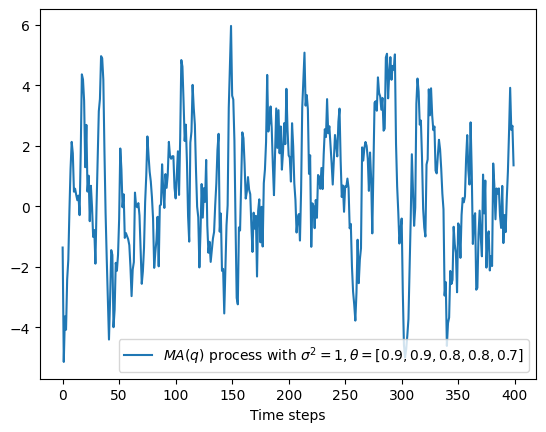

In [72]:
def sample_from_ma(theta, sigma, N, seed=101):
    cov = np.zeros([N,N])
    mu = np.zeros(N)
    q = theta.shape[0]
    # Create covariance matrix
    for i in range(0,N):
        for j in range(0,N):
            h = np.abs(i-j)
            if (h <= q):
                cov[i,j]=np.sum(theta[0:q-h]*theta[h:q])*sigma**2
    return stats.multivariate_normal.rvs(mean=mu,cov=cov,size=1, random_state=seed)

theta = np.asarray([1, 0.9, 0.9, 0.8, 0.8, 0.7])
theta_str = "[0.9, 0.9, 0.8, 0.8, 0.7]"
N = 400
sigma = 1.0
x = np.arange(0,N)
sample = sample_from_ma(theta, sigma, N)
#plt.xticks(range(-6, 6))
plt.plot(x,sample,label=r'$MA(q)$ process with $\sigma^2=1, \theta={}$'.format(theta_str))
#plt.vlines(19, ymin=-6, ymax=6, color='red', linestyle = 'dashed', label='t=19')
#plt.vlines(43, ymin=-6, ymax=6, color = 'green', linestyle = 'dashed', label='t=43')
plt.xlabel('Time steps')
plt.legend(loc='lower right')
plt.show()

## Autocovariance for MA(q) process

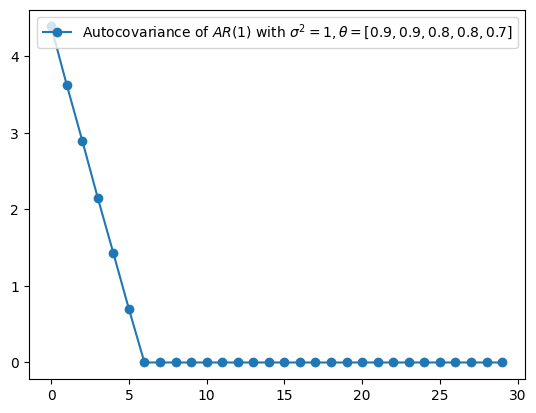

In [74]:
lag = np.arange(0,30)
autocov = np.zeros(30)
q = theta.shape[0]
for i in range(q+1):
    autocov[i] = np.sum(theta[0:q-i]*theta[i:q])*sigma**2
plt.plot(lag, autocov, 'o-' ,label=r'Autocovariance of $AR(1)$ with $\sigma^2=1, \theta={:}$'.format(theta_str))
plt.legend(loc='upper right')
plt.show()

## Sample from an AR(1) process

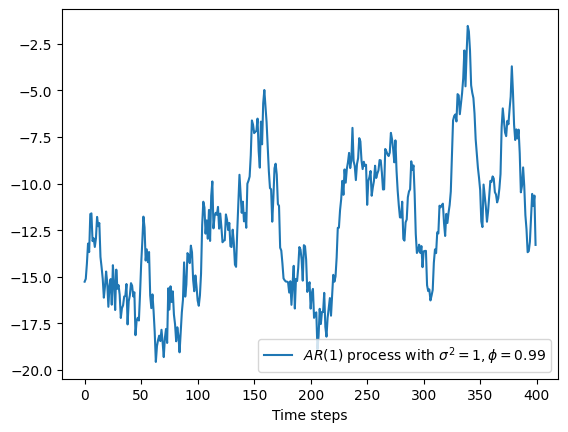

In [40]:
phi = 0.99
N = 400
sigma = 1.0
x = np.arange(0,N)
sample = sample_from_ar1(phi, sigma, N)
#plt.xticks(range(-6, 6))
plt.plot(x,sample,label=r'$AR(1)$ process with $\sigma^2=1, \phi={:}$'.format(phi))
#plt.vlines(19, ymin=-6, ymax=6, color='red', linestyle = 'dashed', label='t=19')
#plt.vlines(43, ymin=-6, ymax=6, color = 'green', linestyle = 'dashed', label='t=43')
plt.xlabel('Time steps')
plt.legend(loc='lower right')
plt.show()

## Autocovariance of AR(1) process

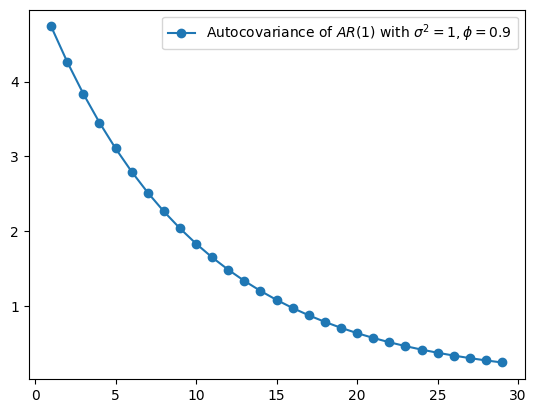

In [98]:
lag = np.arange(1,30)
autocov = (sigma**2 * phi**lag)/(1-phi**2)
plt.plot(lag, autocov, 'o-', label=r'Autocovariance of $AR(1)$ with $\sigma^2=1, \phi={}$'.format(phi))
plt.legend(loc='upper right')
plt.show()